<a href="https://colab.research.google.com/github/jhalto/Machine-learning/blob/main/Optimizer_Comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Breast Cancer Classification with a simple Neural Network


### Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets
from sklearn.model_selection import train_test_split

### Data Collection and Processing


In [ ]:
# loading the data from sk.learn
breast_cancer_dataset =  sklearn.datasets.load_breast_cancer()

In [ ]:
# loading the data to a Panda Dataframe
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#adding the target column to the dataframe
df['Target'] = breast_cancer_dataset.target

In [ ]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
#number of rows and columns in the dataset
df.shape

(569, 31)

In [ ]:
# Some general informantion about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#Checking for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [ ]:
# General statistical Information
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
#checking number of targets along with distribution
# (1 mean  Benign, 0 mean Malignant or Dangerous)
df["Target"].value_counts()

1    357
0    212
Name: Target, dtype: int64

In [ ]:
#Getting idea about two types of target and their general feature values
df.groupby('Target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


#### Seperating Features & Target

In [ ]:
X = df.drop(columns= 'Target', axis=1) #axis 1 is for columns
Y = df['Target']

In [ ]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: Target, Length: 569, dtype: int32


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


#### Standardize the Data (Normalising for better accuracy)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [ ]:
print(X_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


### Building The Neural Network

In [ ]:
# Importing tenserflow and Keras
import tensorflow as tf
tf.random.set_seed(3)  #for constant accuracy score in more than one session
from tensorflow import keras

#### Adam Model

In [ ]:
# setting up the layers of NN
# flatten is taking the 30 feautures and putting it into 1 dimensional array
# first dense is hidden, second is output layer

adam= keras.Sequential([
                        keras.layers.Flatten(input_shape=(30,)),
                        keras.layers.Dense(20, activation='relu'),
                        keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
# Compiling NN

adam.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
# training the NN

history_adam = adam.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 15ms/step - loss: 0.5798 - accuracy: 0.7237 - val_loss: 0.3884 - val_accuracy: 0.9130
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4069 - accuracy: 0.8631 - val_loss: 0.2845 - val_accuracy: 0.9783
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3059 - accuracy: 0.8924 - val_loss: 0.2272 - val_accuracy: 0.9783
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2491 - accuracy: 0.9095 - val_loss: 0.1939 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2119 - accuracy: 0.9218 - val_loss: 0.1719 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1870 - accuracy: 0.9364 - val_loss: 0.1557 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1682 - accuracy: 0.9389 - val_loss: 0.1433 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

#### Visualing accuracy and loss


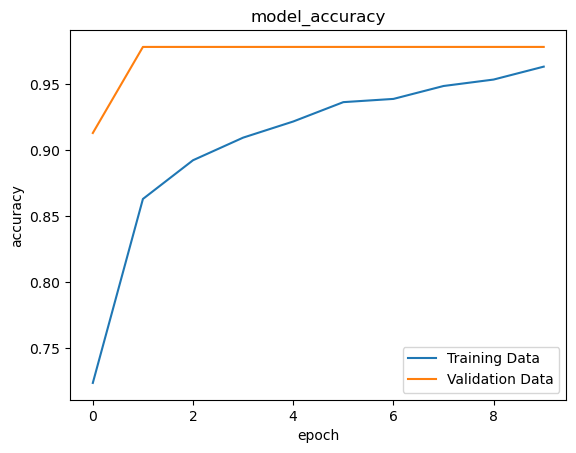

In [ ]:
plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')


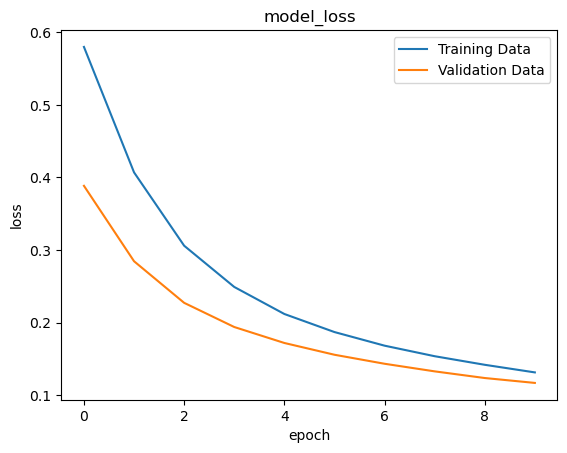

In [ ]:
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])

plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['Training Data', 'Validation Data'], loc = 'upper right')


##### Accuracy of the model on the test data

In [ ]:
loss, accuracy = adam.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9737
0.9736841917037964


## Using other optimizers in the model

#### SGD model

In [ ]:
sgd = keras.Sequential([
                        keras.layers.Flatten(input_shape=(30,)),
                        keras.layers.Dense(20, activation='relu'),
                        keras.layers.Dense(2, activation='sigmoid')
])

sgd.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history_sgd = sgd.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 13ms/step - loss: 0.5428 - accuracy: 0.7726 - val_loss: 0.4758 - val_accuracy: 0.8478
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.8533 - val_loss: 0.3841 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.8851 - val_loss: 0.3290 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3062 - accuracy: 0.9144 - val_loss: 0.2920 - val_accuracy: 0.9130
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2749 - accuracy: 0.9218 - val_loss: 0.2651 - val_accuracy: 0.9130
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2513 - accuracy: 0.9315 - val_loss: 0.2449 - val_accuracy: 0.9130
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2329 - accuracy: 0.9364 - val_loss: 0.2292 - val_accuracy: 0.9130
Epoch 8/10
13/13 [=

In [ ]:
loss, accuracy = sgd.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.9561
0.9561403393745422


#### RMSProp

In [ ]:
rms = keras.Sequential([
                        keras.layers.Flatten(input_shape=(30,)),
                        keras.layers.Dense(20, activation='relu'),
                        keras.layers.Dense(2, activation='sigmoid')
])

rms.compile(optimizer='RMSprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history_rms = rms.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 11ms/step - loss: 0.7342 - accuracy: 0.4890 - val_loss: 0.5340 - val_accuracy: 0.7826
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.7800 - val_loss: 0.3401 - val_accuracy: 0.9783
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3211 - accuracy: 0.9144 - val_loss: 0.2416 - val_accuracy: 0.9783
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2422 - accuracy: 0.9364 - val_loss: 0.1887 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1916 - accuracy: 0.9462 - val_loss: 0.1543 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1571 - accuracy: 0.9560 - val_loss: 0.1318 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1332 - accuracy: 0.9682 - val_loss: 0.1165 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

In [ ]:
loss, accuracy = rms.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.9561
0.9561403393745422


#### Adagrad

In [ ]:
adagra = keras.Sequential([
                        keras.layers.Flatten(input_shape=(30,)),
                        keras.layers.Dense(20, activation='relu'),
                        keras.layers.Dense(2, activation='sigmoid')
])

adagra.compile(optimizer='Adagrad',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history_adagra = adagra.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 11ms/step - loss: 0.8705 - accuracy: 0.3692 - val_loss: 0.7706 - val_accuracy: 0.3913
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.8077 - accuracy: 0.3985 - val_loss: 0.7224 - val_accuracy: 0.4348
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.7634 - accuracy: 0.4205 - val_loss: 0.6845 - val_accuracy: 0.4783
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.7280 - accuracy: 0.4474 - val_loss: 0.6536 - val_accuracy: 0.5435
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.4792 - val_loss: 0.6274 - val_accuracy: 0.5870
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.5330 - val_loss: 0.6046 - val_accuracy: 0.6087
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.5721 - val_loss: 0.5844 - val_accuracy: 0.6957
Epoch 8/10
13/13 [=

In [ ]:
loss, accuracy = adagra.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 1ms/step - loss: 0.6419 - accuracy: 0.7018
0.7017543911933899


#### Nadam

In [ ]:
nadam = keras.Sequential([
                        keras.layers.Flatten(input_shape=(30,)),
                        keras.layers.Dense(20, activation='relu'),
                        keras.layers.Dense(2, activation='sigmoid')
])

nadam.compile(optimizer='Nadam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history_nadam = nadam.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 11ms/step - loss: 0.8098 - accuracy: 0.5990 - val_loss: 0.5099 - val_accuracy: 0.7826
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5256 - accuracy: 0.7604 - val_loss: 0.3387 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.8729 - val_loss: 0.2548 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2958 - accuracy: 0.9071 - val_loss: 0.2107 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2536 - accuracy: 0.9144 - val_loss: 0.1834 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2249 - accuracy: 0.9242 - val_loss: 0.1643 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2026 - accuracy: 0.9315 - val_loss: 0.1497 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

In [ ]:
loss, accuracy = nadam.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.1389 - accuracy: 0.9561
0.9561403393745422


## Trying To capture all optimizers

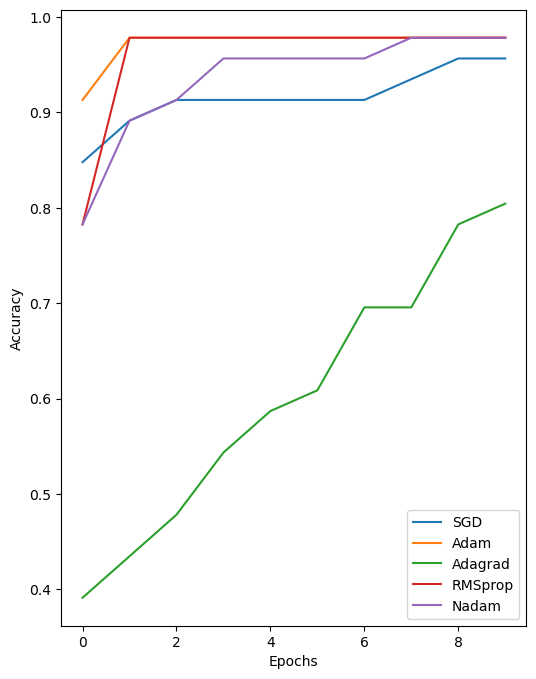

In [ ]:
import matplotlib.pyplot as plt

# Define a dictionary of models and their accuracy history
models = {
    'SGD': history_sgd.history['val_accuracy'],
    'Adam': history_adam.history['val_accuracy'],
    'Adagrad': history_adagra.history['val_accuracy'],
    'RMSprop': history_rms.history['val_accuracy'],
    'Nadam' : history_nadam.history['val_accuracy']
}

# Plot the accuracy of all models in a single plot
plt.figure(figsize=(6, 8))
for optimizer, acc in models.items():
    plt.plot(acc, label=optimizer)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


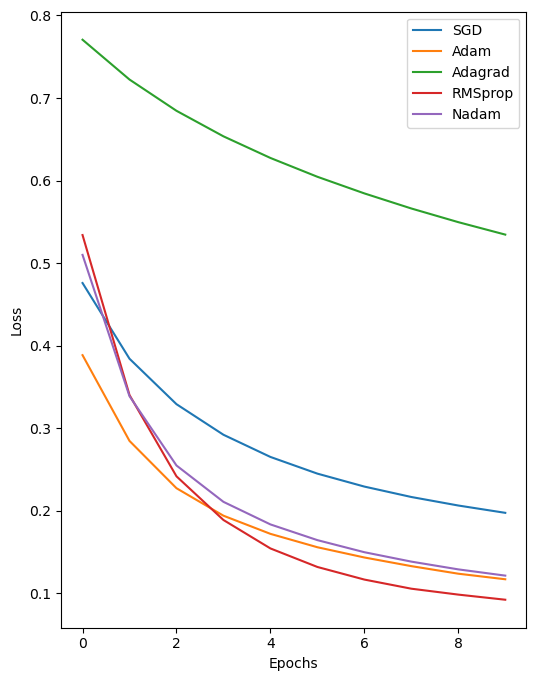

In [ ]:
import matplotlib.pyplot as plt

# Define a dictionary of models and their accuracy history
models = {
    'SGD': history_sgd.history['val_loss'],
    'Adam': history_adam.history['val_loss'],
    'Adagrad': history_adagra.history['val_loss'],
    'RMSprop': history_rms.history['val_loss'],
    'Nadam' : history_nadam.history['val_loss']
}

# Plot the accuracy of all models in a single plot
plt.figure(figsize=(6, 8))
for optimizer, acc in models.items():
    plt.plot(acc, label=optimizer)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()